# TP introduction to Machine Learning
Diane Lingrand (diane.lingrand@univ-cotedazur)

Julie Tores (julie.tores@univ-cotedazur.fr ou julie.tores@etu.univ-cotedazur.fr)

Polytech, SI4, 2023-24

In [11]:
#necessary imports
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

## dataset: Iris

In [12]:
# loading the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

**Question 1:** how many data ?

In [13]:
# your code
print("there is ", len(X), "datas")

there is  150 datas


**Question 2**: type of data ? dimension of data ? type of labels ?

In [14]:
# your code
print("type of data: images")
print("dimension of data: ", X.shape)
print("type of labels: classes (integer between 0 and 2)")

type of data: images
dimension of data:  (150, 4)
type of labels: classes (integer between 0 and 2)


**Question 3:** How many classes ? How many samples per class ?

In [15]:
# your code
print(len(np.unique(y)), "classes")
unique, counts = np.unique(y, return_counts=True)
for i in unique:
    print(i , counts[i])



3 classes
0 50
1 50
2 50


**Question 4:** choose 2 dimensions and plot the data in the plane using a different color for each class.

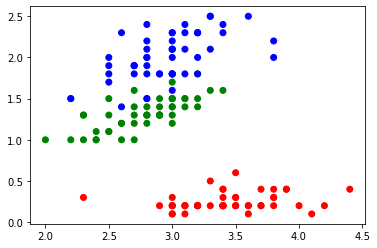

In [16]:
# your code

chosenDimension = [1,3]
colors = ['red', 'green', 'blue']
color_labels = [colors[label] for label in y]
plt.scatter(X[:, chosenDimension[0]], X[:, chosenDimension[1]], c=color_labels)
plt.show()

**Question 5:** perfect classification. What are the metrics values ? Read the documention of metrics function in scikit-learn: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

accuracy of the perfect classification 1.0
recall of the perfect classification:  1.0
f1-score of the perfect classification:  1.0


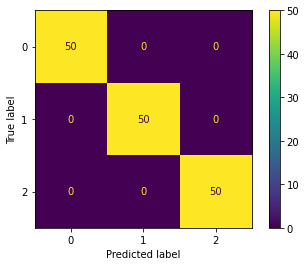

In [17]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# here is an example for accuracy: 
print("accuracy of the perfect classification", accuracy_score(y, y))

# plot also the recall, F1-measures, confusion matrix
print("recall of the perfect classification: ",recall_score(y, y, labels=None, pos_label=1, average='micro', sample_weight=None, zero_division='warn'))
print("f1-score of the perfect classification: ",f1_score(y, y, labels=None, pos_label=1, average='micro', sample_weight=None, zero_division='warn'))
cm = confusion_matrix(y, y, labels=None, sample_weight=None, normalize=None)
ConfusionMatrixDisplay(cm, display_labels=None).plot()
      
# your code

**Question 6**: random classification. What are the metrics values ? <br/>
*Hint*: use https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html for the generation of random labels. <br/>
Don't forget the confusion matrix. Hint: ConfusionMatrixDisplay https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions

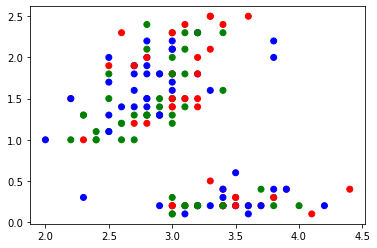

accuracy of the random classification 0.42
recall of the random classification:  0.42
f1-score of the random classification:  0.4183333333333333


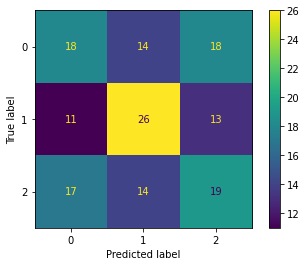

In [18]:
# your code
colors = ['red', 'green', 'blue']
Y_random = np.random.randint(0, 3, 150)
color_labels = [colors[label] for label in Y_random]
plt.scatter(X[:, chosenDimension[0]], X[:, chosenDimension[1]], c=color_labels)
plt.show()

# here is an example for accuracy: 
print("accuracy of the random classification", accuracy_score(y, Y_random))

# plot also the recall, F1-measures, confusion matrix
print("recall of the random classification: ",recall_score(y, Y_random, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn'))
print("f1-score of the random classification: ",f1_score(y, Y_random, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn'))
cm = confusion_matrix(y, Y_random, labels=None, sample_weight=None, normalize=None)
ConfusionMatrixDisplay(cm, display_labels=None).plot()


### binary classification

In [19]:
# we choose to remove class with label 2 (Iris Virginica)
XBinaire = X[y!=2]
yBinaire = y[y!=2]


In [20]:
# split into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XBinaire, yBinaire, test_size=0.4, random_state=42)

**Question 7**: Try to build a classifier better than the random one, use the thresholding on one or more component. Choose the thresholds using the train dataset and compute the metrics on the test dataset.
    

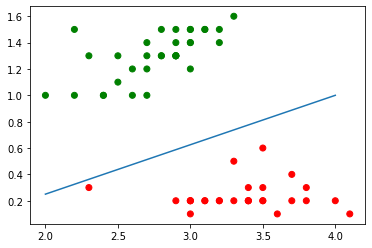

1.6 1.5
1.3 1.375
1.8 1.475
0.3 1.2
0.4 1.275
0.2 1.275
0.2 1.15
1.1 1.375
0.2 1.35
0.2 1.275
0.3 1.425
0.2 1.2
1.2 1.525
0.2 1.375
1.2 1.375
0.2 1.25
1.4 1.7
1.7 1.675
0.1 1.2
0.4 1.35
1.3 1.425
1.3 1.4
0.4 1.25
0.2 1.1
1.1 1.4
0.4 1.425
0.3 1.25
1.3 1.425
0.1 1.225
1.5 1.575
0.2 1.2
0.2 1.15
1.6 1.5
0.2 1.3
1.0 1.25
0.4 1.35
1.5 1.4
1.4 1.675
0.2 1.25
0.4 1.35


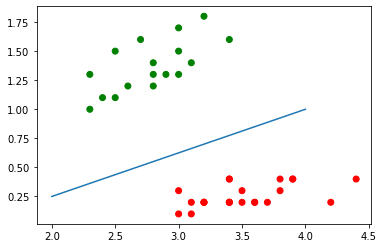

accuracy of the classification 1.0
recall of the classification:  1.0
f1-score of the classification:  1.0


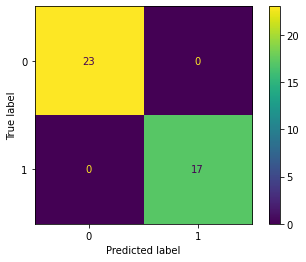

In [21]:
# your code
colors = ['red', 'green', 'blue']
color_labels = [colors[label] for label in y_train]
plt.scatter(X_train[:, chosenDimension[0]], X_train[:, chosenDimension[1]], c=color_labels)
lineX = [2, 4]
lineY = [0.25, 1]
plt.plot(lineX, lineY)
plt.show()

y_pred = []
for x_test in X_test:
    print(x_test[chosenDimension[1]], 0.25*x_test[0])
    if(x_test[chosenDimension[1]] > 0.25*x_test[chosenDimension[0]]):
        y_pred.append(1)
    else:
        y_pred.append(0)

color_labels = [colors[label] for label in y_pred]
plt.scatter(X_test[:, chosenDimension[0]], X_test[:, chosenDimension[1]], c=color_labels)
plt.plot(lineX, lineY)
plt.show()

# here is an example for accuracy: 
print("accuracy of the classification", accuracy_score(y_test, y_pred))



# plot also the recall, F1-measures, confusion matrix
print("recall of the classification: ",recall_score(y_test, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn'))
print("f1-score of the classification: ",f1_score(y_test, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn'))
cm = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None, normalize=None)
ConfusionMatrixDisplay(cm, display_labels=None).plot()


**Question 8**: Using this method, could you propose an algorithm for classifying the 3 classes?

In [22]:
# split into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

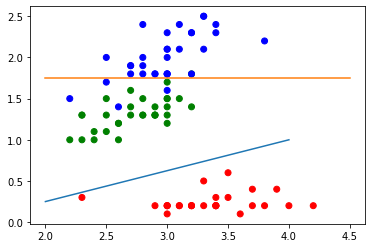

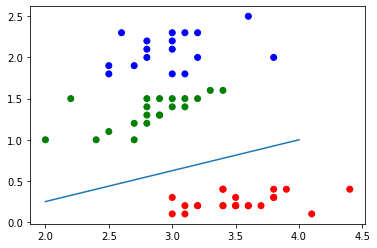

accuracy of the classification 0.9833333333333333
recall of the classification:  0.9814814814814815
f1-score of the classification:  0.981929181929182


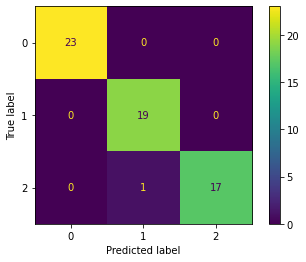

In [23]:
colors = ['red', 'green', 'blue']
color_labels = [colors[label] for label in y_train]
plt.scatter(X_train[:, chosenDimension[0]], X_train[:, chosenDimension[1]], c=color_labels)
LineX = [2, 4.5]
LineY = [1.75, 1.75]
plt.plot(lineX, lineY)
plt.plot(LineX,LineY)
plt.show()

y_pred = []
for x_test in X_test:
    if(x_test[chosenDimension[1]] > 0.25*x_test[chosenDimension[0]]):
        if(x_test[chosenDimension[1]] > 1.75):
            y_pred.append(2)
        else:
            y_pred.append(1)
    else:
        y_pred.append(0)

color_labels = [colors[label] for label in y_pred]
plt.scatter(X_test[:, chosenDimension[0]], X_test[:, chosenDimension[1]], c=color_labels)
plt.plot(lineX, lineY)
plt.show()

# here is an example for accuracy: 
print("accuracy of the classification", accuracy_score(y_test, y_pred))



# plot also the recall, F1-measures, confusion matrix
print("recall of the classification: ",recall_score(y_test, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn'))
print("f1-score of the classification: ",f1_score(y_test, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn'))
cm = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None, normalize=None)
ConfusionMatrixDisplay(cm, display_labels=None).plot()


## dataset: digit

In [24]:
# reading the dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

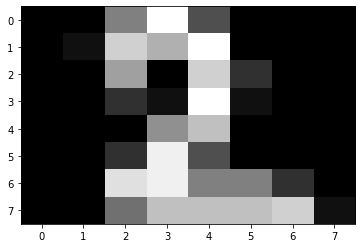

class =  2


In [25]:
#display one of the pictures (the 22th in this code)
import matplotlib.pyplot as plt
i = 22 #index of the image: change it in order to display other images
plt.imshow(X[i].reshape((8,8)),aspect="auto",cmap='gray')
plt.show()
print('class = ', y[i])

**Question 9**: Using the digit dataset, answer again to the previous questions from 1 to 8.

question 9.1

In [26]:
# how many data ?
print("there is ", len(X), "datas")

print("type of data: images")
print("dimension of data: ", X.shape)
print("type of labels: classes (integer between 0 and 2)")

# your code
print(len(np.unique(y)), "classes")
unique, counts = np.unique(y, return_counts=True)
for i in unique:
    print(i , counts[i])



there is  1797 datas
type of data: images
dimension of data:  (1797, 64)
type of labels: classes (integer between 0 and 2)
10 classes
0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180
